In [16]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import load_image, ImageQuant2, raw_data_path
%matplotlib widget

In [17]:
# Import cytoplasmic profile
cytbg = np.loadtxt('../../data/calibration_cyt.txt')

# Import embryos dataframe
df = pd.read_csv('../../data/par2_nebd_embryos.csv')

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == 'lp637') * (df.RNAi == 'wt')].sample(n)
df_c56s = df[(df.Line == 'nwg240') * (df.RNAi == 'wt')].sample(n)
df_l109r = df[(df.Line == 'nwg338') * (df.RNAi == 'wt')].sample(n)
df_l50r = df[(df.Line == 'nwg400') * (df.RNAi == 'wt')].sample(n)
df_het = df[(df.Line == 'nwg325bal') * (df.RNAi == 'wt')].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv('../../data/calibration_embryos.csv')

In [18]:
# Import data
df = pd.read_csv('../../data/calibration_embryos.csv')
if raw_data_path:
    df['Path'] = df['Path'].apply(lambda x: raw_data_path + x)
paths_wt = df[df.Line == 'lp637'].Path.to_list()
paths_c56s = df[df.Line == 'nwg240'].Path.to_list()
paths_l109r = df[df.Line == 'nwg338'].Path.to_list()
paths_l50r = df[df.Line == 'nwg400'].Path.to_list()
paths_het = df[df.Line == 'nwg325bal'].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + '/af_corrected.tif') for p in paths_wt]
imgs_c56s = [load_image(p + '/af_corrected.tif') for p in paths_c56s]
imgs_l109r = [load_image(p + '/af_corrected.tif') for p in paths_l109r]
imgs_l50r = [load_image(p + '/af_corrected.tif') for p in paths_l50r]
imgs_het = [load_image(p + '/af_corrected.tif') for p in paths_het]

rois_wt = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_wt]
rois_c56s = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_c56s]
rois_l109r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l109r]
rois_l50r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l50r]
rois_het = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_het]

10


In [19]:
# Global calibration parameters
kwargs_dict = {'lr': 0.005, 'descent_steps': 1000}

### Calibration 1 (WT)

100%|██████████| 1000/1000 [00:11<00:00, 87.46it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

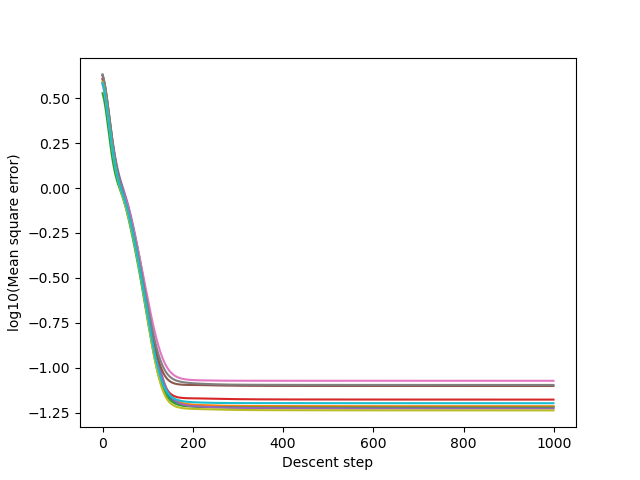

In [20]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)

100%|██████████| 1000/1000 [00:11<00:00, 87.85it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

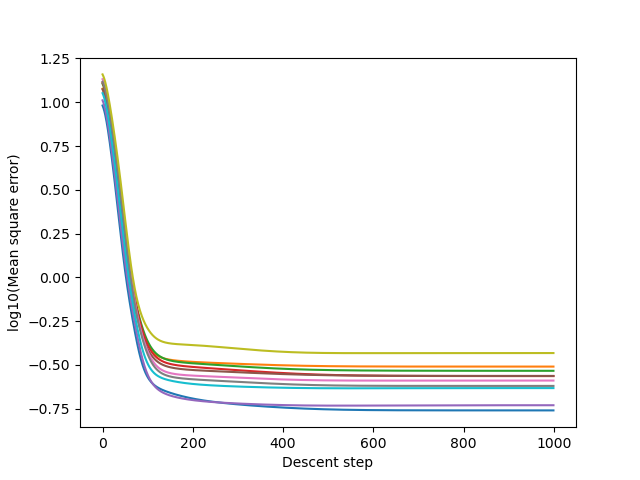

In [21]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:09<00:00, 100.14it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

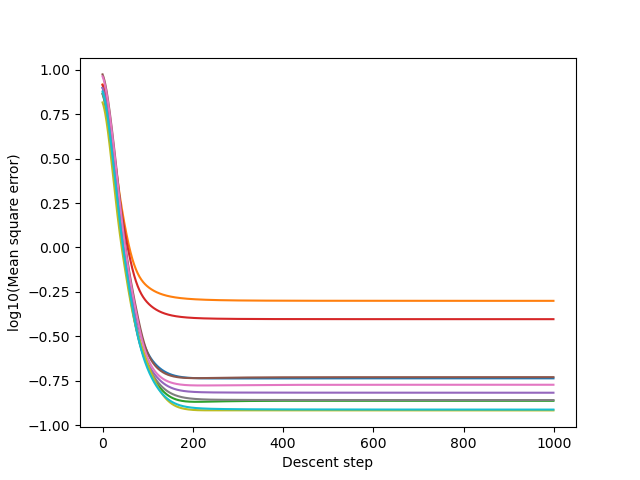

In [22]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:12<00:00, 77.69it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

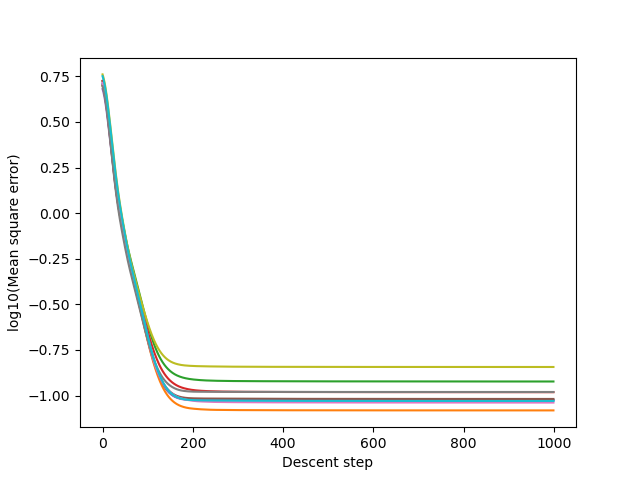

In [23]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:10<00:00, 96.72it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

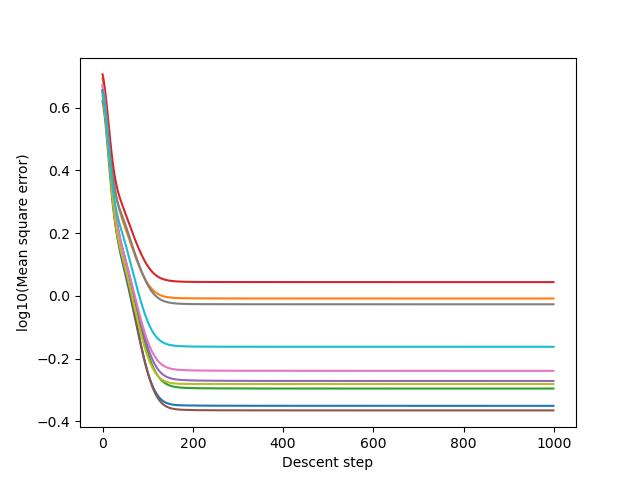

In [24]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)

100%|██████████| 1000/1000 [00:24<00:00, 40.37it/s]


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

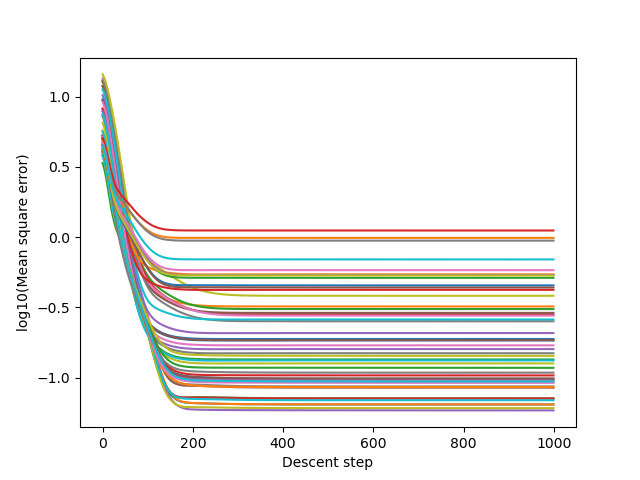

In [25]:
iq6 = ImageQuant2(img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het, 
                  roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het, cytbg=cytbg)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

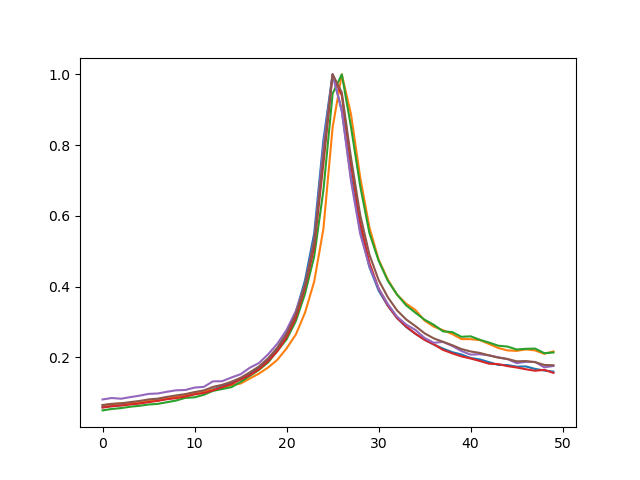

In [26]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [27]:
# Save
np.savetxt('../../data/calibration_mem1.txt', iq1.membg)
np.savetxt('../../data/calibration_mem2.txt', iq2.membg)
np.savetxt('../../data/calibration_mem3.txt', iq3.membg)
np.savetxt('../../data/calibration_mem4.txt', iq4.membg)
np.savetxt('../../data/calibration_mem5.txt', iq5.membg)
np.savetxt('../../data/calibration_mem6.txt', iq6.membg)